# 実質賃金と国民負担率
---
$(所得) = (消費税を除く租税) + (社会保障費) + (消費税抜き消費支出) + (消費税) + (貯蓄)$

所得: $X$ ここでは「実質所得指数」

$T$: 消費税率

$\alpha$: 平均消費性向 ($0<\alpha<1$) $=\dfrac{(消費税抜き消費支出)+(消費税)}{(可処分所得)}$

$(可処分所得)=(消費税抜き消費支出) + (消費税) + (貯蓄)$

$\beta$: 国民負担率 ($0<\beta<1$) $=\dfrac{(消費税を除く租税)+(消費税)+(社会保障費)}{(所得)}$

消費税抜き消費支出: 
$x=\dfrac{\alpha(1-\beta)}{1+(1-\alpha)T}X$

消費税: $Tx$

貯蓄額: $\dfrac{1-\alpha}{\alpha}(1+T)x$

(消費税を除く租税) + (社会保障費): $X-\dfrac{1}{\alpha}(1+T)x$


In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## load data for actual wage
---

In [2]:
#-- actual wage
filename = '../data/ActualNominalWage.yml'
with open( filename, 'r' ) as fp: 
    yml = yaml.safe_load( stream=fp )
ActualNominalWage_ref = yml['ref']
ActualNominalWage_url = yml['url']
data = []
for datum in yml['data']:
    data.append( dict( Year=int( datum['year'] ), ActualNominalWage=datum['actual wage'] ) )
ActualNominalWage = pd.DataFrame( data )
#ActualNominalWage

## load data for national contribution ratio
---

In [3]:
#-- national contribution ratio
filename = '../data/NationalContributionRatio.yml'
with open( filename, 'r' ) as fp:
    yml = yaml.safe_load( stream=fp )
NationalContributionRatio_ref = yml['ref']
NationalContributionRatio_url = yml['url']
data = []
for datum in yml['data']:
    data.append( dict( Year=int( datum['year'] ), NationalContributionRatio=( datum['national contribution ratio'] / 100.0 ) ) )
NationalContributionRatio = pd.DataFrame( data )
# NationalContributionRatio

## set VAT rate
---

In [4]:
ymin = NationalContributionRatio.Year.min()
ymax = NationalContributionRatio.Year.max()
data = []
for y in range( ymin, ymax + 1 ):
    if y < 1989:
        vat = 0.0
    elif y < 1997:
        vat = 0.03
    elif y < 2014:
        vat = 0.05
    elif y < 2019:
        vat = 0.08
    else:
        vat = 0.1
    data.append( dict( Year=int( y ), VAT=vat ) )
VAT = pd.DataFrame( data )
# VAT

## set consumer propensity
---

In [5]:
#-- consumer propensity
filename = '../data/AverageConsumerPropensity.yml'
with open( filename, 'r' ) as fp:
    yml = yaml.safe_load( stream=fp )
AverageConsumerPropensity_ref = yml['ref']
AverageConsumerPropensity_url = yml['url']
ymin = NationalContributionRatio.Year.min()
ymax = NationalContributionRatio.Year.max()
xvals = [ datum['year']                for datum in yml['data'] ]
yvals = [ datum['consumer propensity'] for datum in yml['data'] ]
data = []
for yyyy in range( ymin, ymax + 1 ):
    data.append( dict( Year=int( yyyy ), AverageConsumerPropensity=np.interp( yyyy, xvals, yvals ) ) )
AverageConsumerPropensity = pd.DataFrame( data )
# AverageConsumerPropensity

## form data
---

In [6]:
df = pd.merge( pd.merge( pd.merge( ActualNominalWage, NationalContributionRatio ), VAT ), AverageConsumerPropensity )
x = df.Year
NormAW = df.ActualNominalWage / df.ActualNominalWage[0] * 100 # normalized actual wage (1990 => 100 )
NormCI = df.AverageConsumerPropensity * ( 1 - df.NationalContributionRatio ) / ( 1 + ( 1 - df.AverageConsumerPropensity ) * df.VAT ) * NormAW
NormVT = df.VAT * NormCI
NormSV = ( 1 - df.AverageConsumerPropensity ) / df.AverageConsumerPropensity * ( NormCI + NormVT )
NormTX = NormAW - NormCI - NormVT - NormSV
NormNC = df.NationalContributionRatio * 100
df

Year  ActualNominalWage  NationalContributionRatio   VAT  \
0   1990              111.8                      0.384  0.03   
1   1991              113.1                      0.374  0.03   
2   1992              113.5                      0.363  0.03   
3   1993              112.4                      0.363  0.03   
4   1994              113.6                      0.349  0.03   
5   1995              115.1                      0.357  0.03   
6   1996              116.5                      0.352  0.03   
7   1997              116.4                      0.363  0.05   
8   1998              114.1                      0.362  0.05   
9   1999              112.7                      0.354  0.05   
10  2000              113.9                      0.356  0.05   
11  2001              113.2                      0.365  0.05   
12  2002              111.0                      0.350  0.05   
13  2003              110.5                      0.341  0.05   
14  2004              110.0                      0.345  0.05   
15  2005              111.2                      0.362  0.05   
16  2006              111.1                      0.370  0.05   
17  2007              109.9                      0.379  0.05   
18  2008              107.9                      0.392  0.05   
19  2009              105.3                      0.372  0.05   
20  2010              106.8                      0.372  0.05   
21  2011              106.9                      0.389  0.05   
22  2012              105.9                      0.398  0.05   
23  2013              105.1                      0.401  0.05   
24  2014              102.3                      0.424  0.08   
25  2015              101.3                      0.423  0.08   
26  2016              102.0                      0.427  0.08   
27  2017              101.9                      0.433  0.08   
28  2018              102.1                      0.442  0.08   
29  2019              101.2                      0.443  0.10   
30  2020              100.0                      0.479  0.10   
31  2021              100.6                      0.481  0.10   
32  2022               99.6                      0.475  0.10   

    AverageConsumerPropensity  
0                      0.8326  
1                      0.8212  
2                      0.8098  
3                      0.7984  
4                      0.7870  
5                      0.7848  
6                      0.7826  
7                      0.7804  
8                      0.7782  
9                      0.7760  
10                     0.7802  
11                     0.7844  
12                     0.7886  
13                     0.7928  
14                     0.7970  
15                     0.8004  
16                     0.8038  
17                     0.8072  
18                     0.8106  
19                     0.8140  
20                     0.8062  
21                     0.7984  
22                     0.7906  
23                     0.7828  
24                     0.7750  
25                     0.7380  
26                     0.7220  
27                     0.7210  
28                     0.6930  
29                     0.6790  
30                     0.6130  
31                     0.6280  
32                     0.6400

## plot

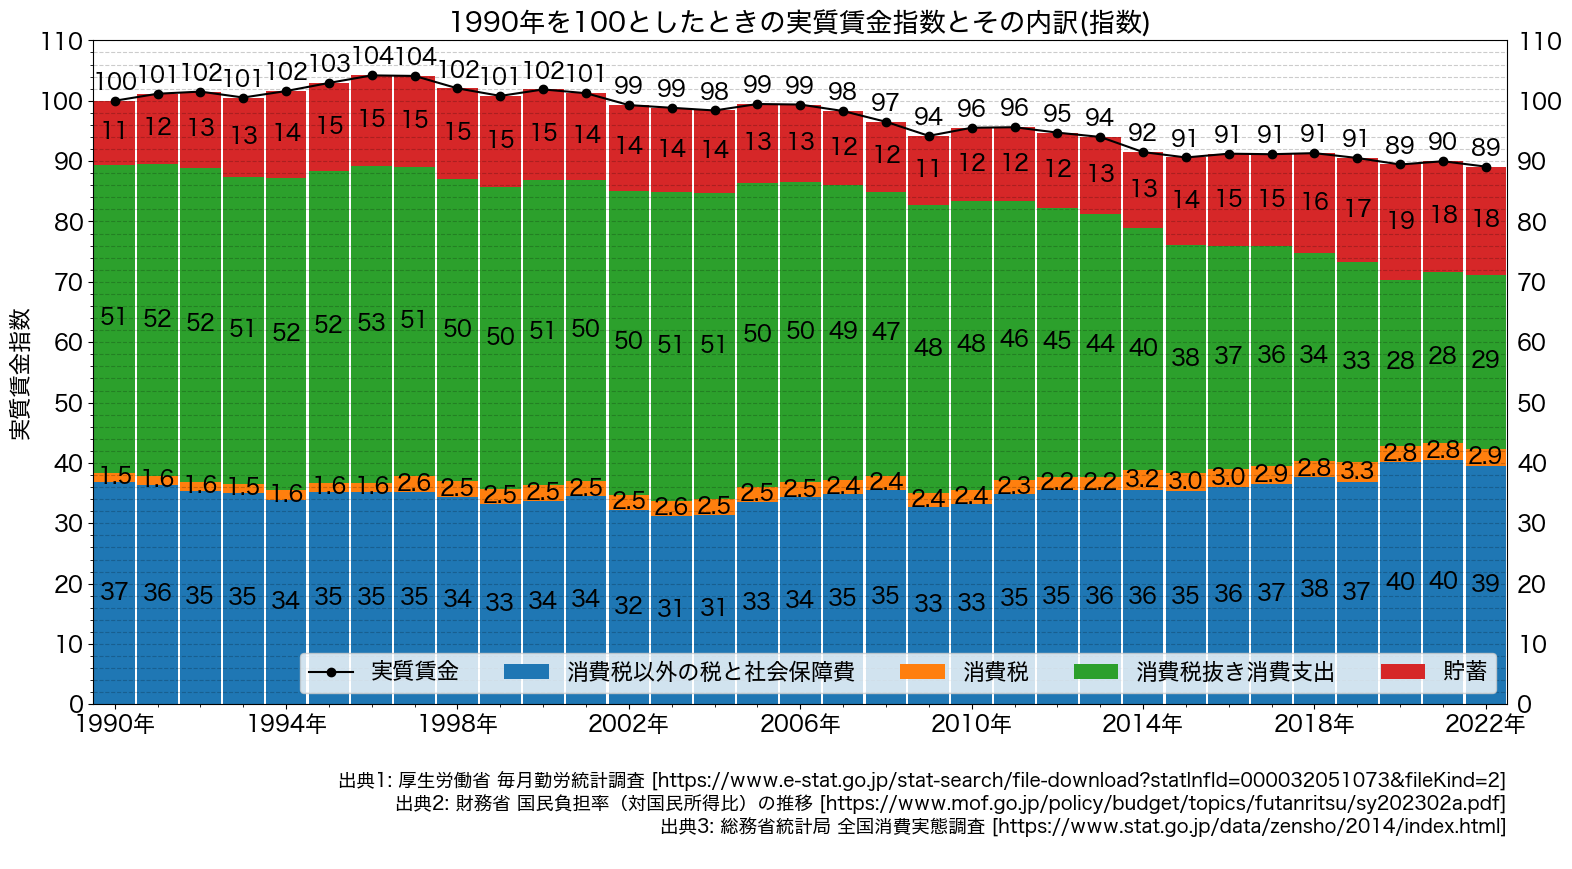

In [7]:
# plt.rcParams['font.family'] = "IPAPGothic"
plt.rcParams['font.family'] = "Hiragino Sans"
plt.rcParams['font.size'] = 16
width = 0.95
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=( 16, 9 ) )
ax.plot( x, NormAW, marker='o', color='black', label='実質賃金' )
bottom = np.full_like( NormAW, fill_value=0 )
ax.bar( x, NormTX, width=width, bottom=bottom, label='消費税以外の税と社会保障費' )
bottom += NormTX
ax.bar( x, NormVT, width=width, bottom=bottom, label='消費税' )
bottom += NormVT
ax.bar( x, NormCI, width=width, bottom=bottom, label='消費税抜き消費支出' )
bottom += NormCI
ax.bar( x, NormSV, width=width, bottom=bottom, label='貯蓄' )
for xval, AWval, CIval, SVval, VTval, TXval in zip( x, NormAW, NormCI, NormSV, NormVT, NormTX ):
    #-- 実質賃金指数
    text = '%d' % np.round( AWval )
    xy = ( xval, AWval + 1 )
    ax.annotate( text=text, xy=xy, color='black', horizontalalignment='center', verticalalignment='bottom'  )
    #-- 貯蓄指数
    text = '%d' % np.round( SVval )
    xy = ( xval, 0.5 * SVval + TXval + VTval + CIval )
    ax.annotate( text=text, xy=xy, color='black', horizontalalignment='center', verticalalignment='center'  )
    #-- 消費税抜き消費支出指数
    text = '%d' % np.round( CIval )
    xy = ( xval, 0.5 * CIval + TXval + VTval )
    ax.annotate( text=text, xy=xy, color='black', horizontalalignment='center', verticalalignment='center'  )
    #-- 消費税指数
    text = '%.1f' % np.round( VTval, decimals=2 )
    xy = ( xval, 0.5 * VTval + TXval )
    ax.annotate( text=text, xy=xy, color='black', horizontalalignment='center', verticalalignment='center'  )
    #-- 消費税以外の税と社会保障費の指数
    text = '%d' % np.round( TXval )
    xy = ( xval, 0.5 * TXval )
    ax.annotate( text=text, xy=xy, color='black', horizontalalignment='center', verticalalignment='center'  )
xmin = x.min() - 0.5
xmax = x.max() + 0.5
ax.set_xlim( left=xmin, right=xmax )
ax.set_ylim( bottom=0.0, top=110 )
ticks = np.linspace( start=1990, stop=2022, num=9 )
labels = [ '%d年' % i for i in ticks ]
ax.set_xticks( ticks, labels=labels  )
ax.set_yticks( np.linspace( start=0, stop=110, num=12 ) )
# ax.set_xlabel( '年' )
ax.set_ylabel( '実質賃金指数' )
ax.tick_params( labelright=True )
ax.minorticks_on()
ax.grid( axis='y', which='both', color='black', alpha=0.2, linestyle='--' )
# ax.set_axisbelow( True )
text = '1990年を100としたときの実質賃金指数とその内訳(指数)'
ax.set_title( text )
text = '出典1: ' + ActualNominalWage_ref         + ' [' + ActualNominalWage_url         + ']\n' \
       '出典2: ' + NationalContributionRatio_ref + ' [' + NationalContributionRatio_url + ']\n' \
       '出典3: ' + AverageConsumerPropensity_ref + ' [' + AverageConsumerPropensity_url + ']\n'
ax.text( 1.0, -0.1, text, fontsize='small', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax.legend( loc='lower right', ncols=5 )
fig.tight_layout()
plt.savefig( 'Wage.png' )